In [21]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Import the dataset
# Read the file
data = pd.read_excel("individual_lab_abc.xlsx")

In [23]:
# Define the function for ABC Segmentation
def ABC_segmentation(perc):
   # Creates the 3 classes A, B, and C based on cost percentages (A-60%, B-25%, C-15%)
 
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [24]:
data.head()

,Item#,Item_name,usage,Unit_cost
0,1,Vanila almond milk,4.0,4.99
1,2,OG Kefir,1.0,4.99
2,3,Chicken Breast,3.0,6.99
3,4,Ground Beef,4.0,8.99
4,5,Bagel Wheat 6PK,2.0,4.99


In [25]:
# order by the field of interest
data= data.sort_values(by=['Unit_cost'], ascending=False)
data.head()

,Item#,Item_name,usage,Unit_cost
5,6,Beef round stew meat,4.0,12.99
7,8,Seaside ChDDR,0.9,12.99
34,35,Supreme Pizza,3.0,9.99
3,4,Ground Beef,4.0,8.99
35,36,Canadian Bacon,3.0,6.99


In [26]:
# create the column of the running Cumulative Unit Cost per SKU, use  the cumsum() function
data['RunCumUC'] = data['Unit_cost'].cumsum()
data.head()

,Item#,Item_name,usage,Unit_cost,RunCumUC
5,6,Beef round stew meat,4.0,12.99,12.99
7,8,Seaside ChDDR,0.9,12.99,25.98
34,35,Supreme Pizza,3.0,9.99,35.97
3,4,Ground Beef,4.0,8.99,44.96
35,36,Canadian Bacon,3.0,6.99,51.95


In [27]:
# Calculate total sum of additive cost
Total_Sum = data['Unit_cost'].sum()
print(Total_Sum)

153.54000000000002


In [28]:
# create the column of the running percentage
data['RunPerc'] =  data['RunCumUC']/Total_Sum
data.head()

,Item#,Item_name,usage,Unit_cost,RunCumUC,RunPerc
5,6,Beef round stew meat,4.0,12.99,12.99,0.084603
7,8,Seaside ChDDR,0.9,12.99,25.98,0.169207
34,35,Supreme Pizza,3.0,9.99,35.97,0.234271
3,4,Ground Beef,4.0,8.99,44.96,0.292823
35,36,Canadian Bacon,3.0,6.99,51.95,0.338348


In [29]:
# create the column of the class by using the user defined function
data['Class'] = data['RunPerc'].apply(ABC_segmentation)
data.head()

,Item#,Item_name,usage,Unit_cost,RunCumUC,RunPerc,Class
5,6,Beef round stew meat,4.0,12.99,12.99,0.084603,A
7,8,Seaside ChDDR,0.9,12.99,25.98,0.169207,A
34,35,Supreme Pizza,3.0,9.99,35.97,0.234271,A
3,4,Ground Beef,4.0,8.99,44.96,0.292823,A
35,36,Canadian Bacon,3.0,6.99,51.95,0.338348,A


In [30]:
# Show the numbers in each class
data.Class.value_counts()

C    14
A    12
B    10
Name: Class, dtype: int64

In [31]:
# Calculate and print total unit cost per class

print ('Unit cost of Class A :', round(data[data.Class == 'A']['Unit_cost'].sum(), 2))
print ('Unit cost of Class B :', round(data[data.Class == 'B']['Unit_cost'].sum(), 2))
print ('Unit cost of Class C :', round(data[data.Class == 'C']['Unit_cost'].sum(), 2))

Unit cost of Class A : 90.88
Unit cost of Class B : 38.4
Unit cost of Class C : 24.26


In [32]:
# Calculate and print the percent of unit cost per class
print ('Percent of Unit cost of Class A :', round(data[data.Class == 'A']['Unit_cost'].sum()/data['Unit_cost'].sum()*100,2))
print ('Percent of Unit cost of Class B :', round(data[data.Class == 'B']['Unit_cost'].sum()/data['Unit_cost'].sum()*100, 2))
print ('Percent of Unit cost of Class C :', round(data[data.Class == 'C']['Unit_cost'].sum()/data['Unit_cost'].sum()*100, 2))


Percent of Unit cost of Class A : 59.19
Percent of Unit cost of Class B : 25.01
Percent of Unit cost of Class C : 15.8


In [33]:
# Calculate and print the percent of quantity per class
print ('Percent of Quantity Class A :', round(data[data.Class == 'A']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Quantity Class B :', round(data[data.Class == 'B']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Quantity Class C :', round(data[data.Class == 'C']['Class'].count()/data['Class'].count()*100, 2))

Percent of Quantity Class A : 33.33
Percent of Quantity Class B : 27.78
Percent of Quantity Class C : 38.89


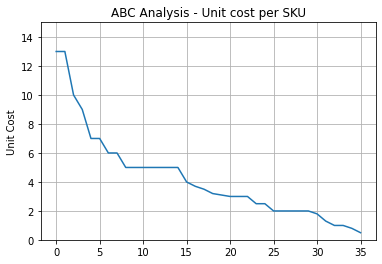

In [34]:
# Convert the Cost column to a list
visual = data['Unit_cost'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('Unit Cost')
plt.title('ABC Analysis - Unit cost per SKU')
plt.grid(True)
plt.ylim((0,15))
plt.show()

# Plot that list, Provide proper headings to the plot

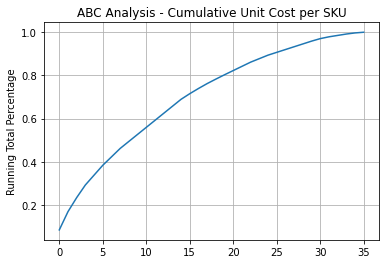

In [35]:
# Convert the running percentage column to a list
visual = data['RunPerc'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Unit Cost per SKU')
plt.grid(True)
plt.show()


# Plot that list, Provide proper headings to the plot